# Laboratorio #1

Para la realización de este laboratorio deben usar Python como herramienta de desarrollo (pueden usar ustedes ejemplos como los presentados, o SciKit, o bien OpenCV, o análogo). Es imprescindible, eso si, no sólo que todos los códigos se presenten como anexos bien comentados, sino que en todos los casos se haga una descripción a nivel metodológico del planteamiento de la solución. Recuerden que ya se ha impartido el tema de estructura y función de un sistema de visión y los lineamientos ahí desarrollados pasan a ser de obligado cumplimiento de aquí en adelante en el curso, tanto en el diseño de soluciones como en la descripción de las mismas. Es decir, es importante practicar el análisis del problema y descripción de las soluciones en base a bloques, aunque inicialmente sean muy sencillos

### Ejercicio 1: Diagnostico de imagen

- En este ejercicio van a usar ustedes las imágenes denominadas
“botellamarcada-parcial” y “botellafondo”
- ¿Qué pueden decir sobre la calidad de cada una de ellas? Justifiquen sus
respuestas
- Transformen las imágenes de manera que se obtenga la mejor calidad
posible. Una vez transformadas ¿Qué pueden afirmar sobre las diferencias
entre ellas? Recuerden que todas sus afirmaciones han de justificarse
adecuadamente.

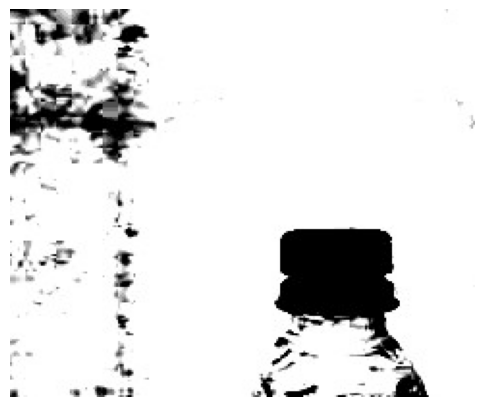

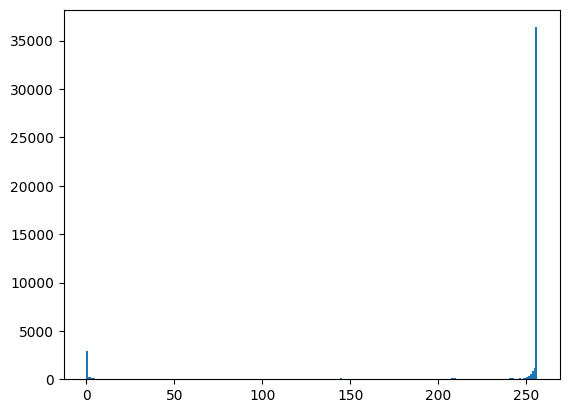

In [210]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import os

img1 = cv.imread('botellafondo.jpeg', cv.IMREAD_GRAYSCALE)
assert img1 is not None, "file could not be read, check with os.path.exists()"

# En Jupyter, usar matplotlib en lugar de cv.imshow
plt.figure(figsize=(6,6))
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

plt.hist(img1.ravel(), bins=256, range=(0,256))
plt.show()

Al observar el histograma de la imagen "botellafondo.jpeg" podemos observar que tiene picos en ambos extremos, en los tonos oscuros y claros. Por lo que se puede afirmar que la imagen esta saturada, no tiene contraste útil y además no hay ningún provecho del rango dinámico.

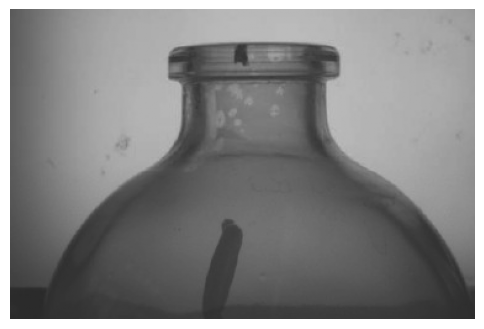

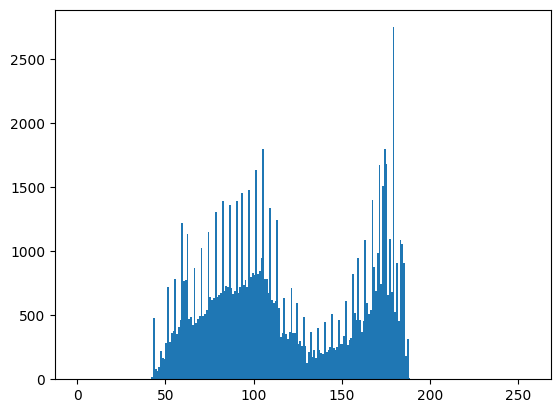

In [211]:
img2 = cv.imread('botellamarcada-parcial.png', cv.IMREAD_GRAYSCALE)
assert img2 is not None, "file could not be read, check with os.path.exists()"

# En Jupyter, usar matplotlib en lugar de cv.imshow
plt.figure(figsize=(6,6))
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

plt.hist(img2.ravel(), bins=256, range=(0,256))
plt.show()

En el caso de esta imagen, se tiene una buen contraste, ya que hay una buena distribución de los pixeles, y parece que la imagen no está saturada. A pesar de esto, se podría aprovechar más el rango dinámico para hacer más provechosa la información de esta imagen y obtener más detalle en toda la imagen.

Clipping negros (0): 6.1%  |  Clipping blancos (255): 75.1%


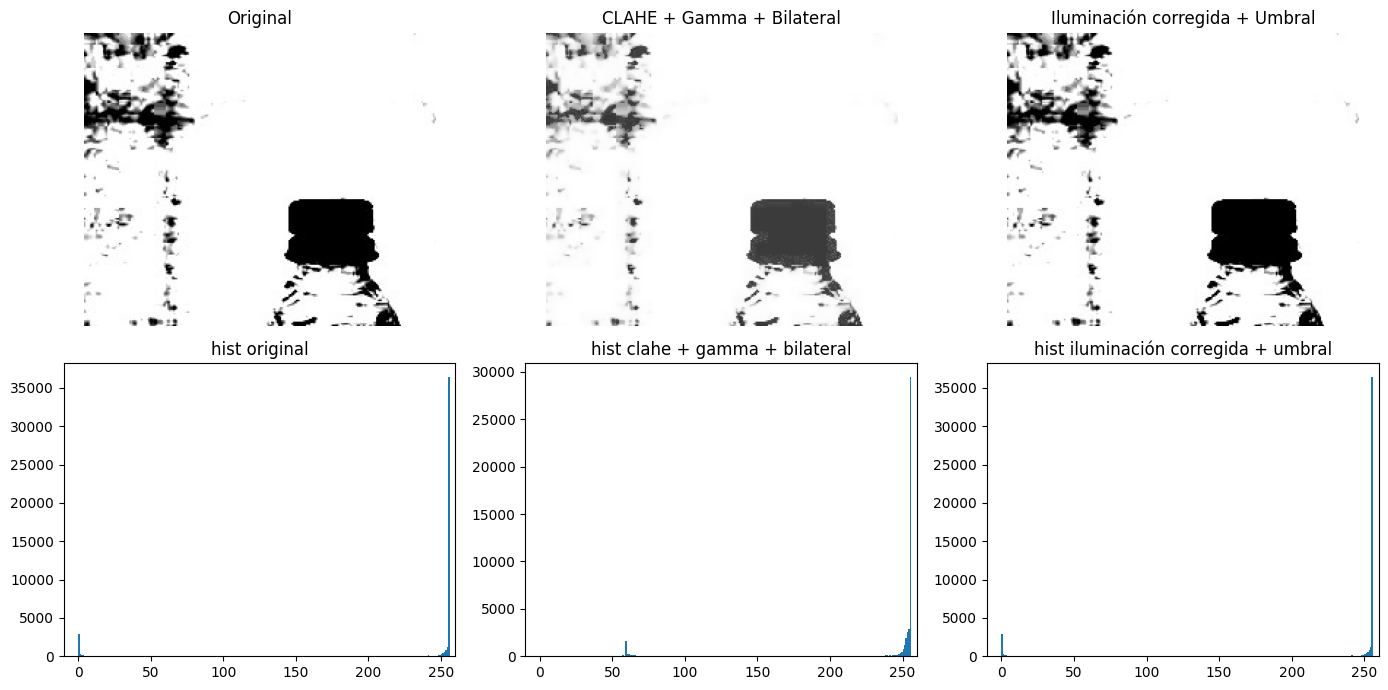

In [212]:
# Modificar imagen 1 para mejorar contraste y saturacion (imagen en escala de grises)

img = cv.imread('botellafondo.jpeg', cv.IMREAD_GRAYSCALE)
assert img is not None, "No se pudo leer la imagen. Verifica la ruta."
# porcentaje de pixeles en 0 y 255 (clipping)
p0    = (img == 0).mean() * 100
p255  = (img == 255).mean() * 100
print(f"Clipping negros (0): {p0:.1f}%  |  Clipping blancos (255): {p255:.1f}%")

#alpha = 2.0   # contraste
#beta  = 0     # brillo
#lin = cv.convertScaleAbs(img, alpha=alpha, beta=beta)

clahe = cv.createCLAHE(clipLimit=4.0, tileGridSize=(8,8))
img_clahe = clahe.apply(img)

gamma = 2.7  # <1 aclara sombras; >1 oscurece altas luces
table = np.array([(i/255.0)**(1.0/gamma) * 255 for i in range(256)], dtype=np.uint8)
img_gamma = cv.LUT(img_clahe, table)

img_enhanced = cv.bilateralFilter(img_gamma, d=5, sigmaColor=20, sigmaSpace=20)

# Corrección de iluminación + Umbral adaptativo
corr = cv.normalize(img, None, 0, 255, cv.NORM_MINMAX)
#thr = cv.adaptiveThreshold(corr, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY, 35, 5)


def plot_img_and_hist(ax_img, ax_hist, image, title):
    ax_img.imshow(image, cmap='gray', vmin=0, vmax=255)
    ax_img.set_title(title)
    ax_img.axis('off')
    # histograma (para binaria también sirve, verás picos en 0 y 255)
    ax_hist.hist(image.ravel(), bins=256, range=(0,256))
    ax_hist.set_xlim([-10, 260])
    ax_hist.set_title(f"hist {title.lower()}")

plt.figure(figsize=(14,7))

ax1 = plt.subplot(2,3,1); ax2 = plt.subplot(2,3,4)
plot_img_and_hist(ax1, ax2, img, "Original")

#ax3 = plt.subplot(2,4,2); ax4 = plt.subplot(2,4,6)
#plot_img_and_hist(ax3, ax4, lin, "Lineal (alpha/beta)")

ax5 = plt.subplot(2,3,2); ax6 = plt.subplot(2,3,5)
plot_img_and_hist(ax5, ax6, img_enhanced, "CLAHE + Gamma + Bilateral")

ax7 = plt.subplot(2,3,3); ax8 = plt.subplot(2,3,6)
plot_img_and_hist(ax7, ax8, corr, "Iluminación corregida + Umbral")

plt.tight_layout()
plt.show()

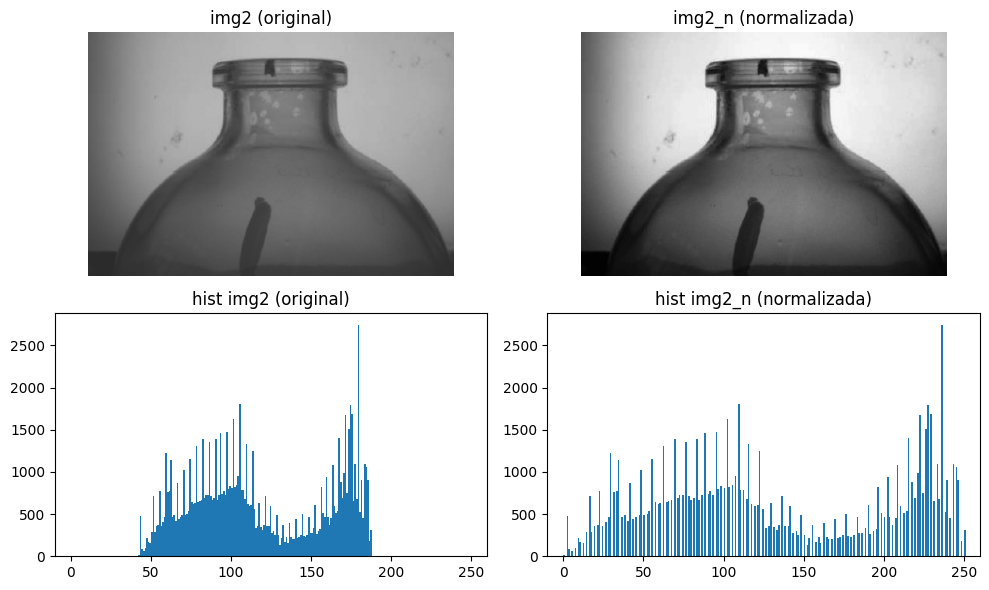

In [213]:
img2_n= cv.imread('botellamarcada-parcial.png', cv.IMREAD_GRAYSCALE)
assert img2_n is not None, "No se pudo leer la imagen. Verifica la ruta."
corr2 = cv.normalize(img2_n, None, 0, 255, cv.NORM_MINMAX)
# Mostrar img2 y img2_n con sus histogramas usando plot_img_and_hist
assert 'plot_img_and_hist' in globals(), 'Ejecute primero la celda que define plot_img_and_hist.'
assert 'img2' in globals(), 'Ejecute la celda que carga img2 (botellamarcada-parcial).'
assert 'img2_n' in globals(), 'Ejecute la celda que carga img2_n.'

plt.figure(figsize=(10,6))
ax1 = plt.subplot(2,2,1); ax2 = plt.subplot(2,2,3)
plot_img_and_hist(ax1, ax2, img2, 'img2 (original)')

ax3 = plt.subplot(2,2,2); ax4 = plt.subplot(2,2,4)
plot_img_and_hist(ax3, ax4, corr2, 'img2_n (normalizada)')

plt.tight_layout()
plt.show()


### Ejercicio 2: Umbralización

- En este ejercicio van a usar ustedes la imagen denominada “halógeno”
- Se nos dice que queremos umbralizar (de alguna forma) dicha imagen. El objetivo del análisis por medio de Visión por Computadora es triple:
     - Examinar la integridad del filamento de la bombilla
     - Verificar que el perfil de la bombilla corresponde a un perfil ideal previamente conocido
     - Observar el vidrio de la bombilla tal como está, sin que ningún otro elemento nos distraiga
- Justifiquen el análisis y las decisiones. Presenten los resultados obtenidos

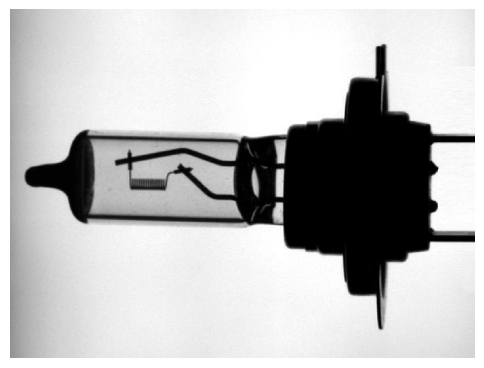

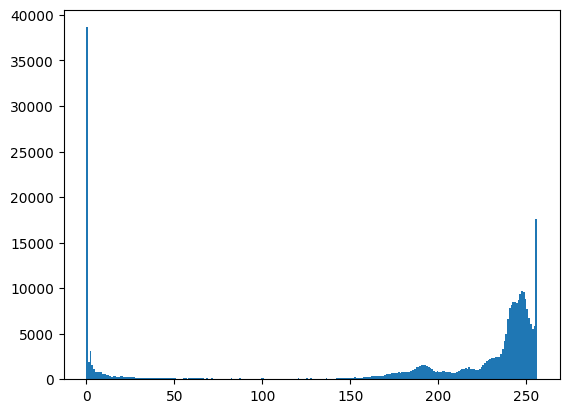

In [214]:
img3 = cv.imread('halogeno.jpg', cv.IMREAD_GRAYSCALE)
assert img3 is not None, "file could not be read, check with os.path.exists()"
# En Jupyter, usar matplotlib en lugar de cv.imshow
plt.figure(figsize=(6,6))
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()
plt.hist(img3.ravel(), bins=256, range=(0,256))
plt.show()

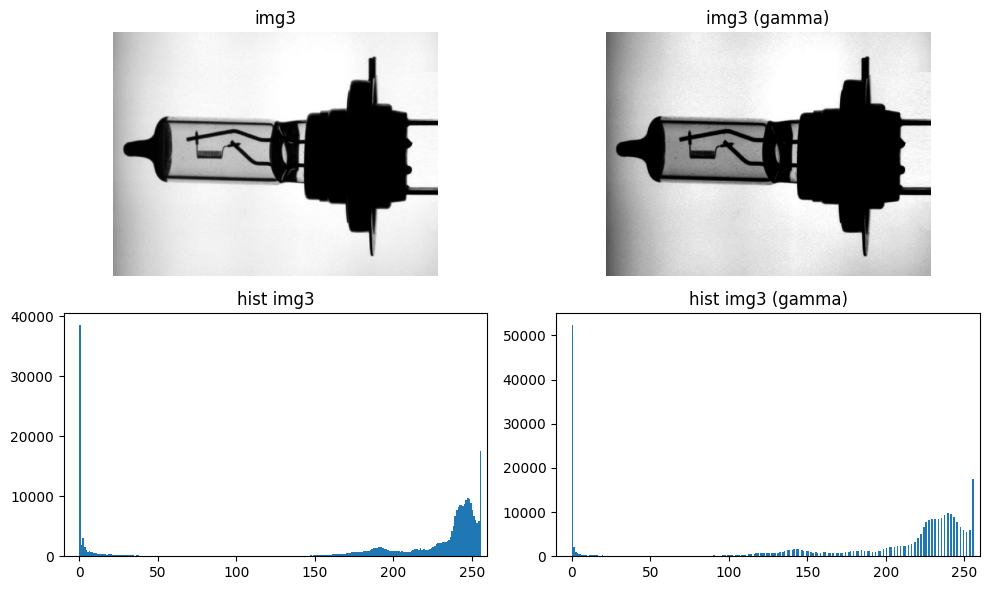

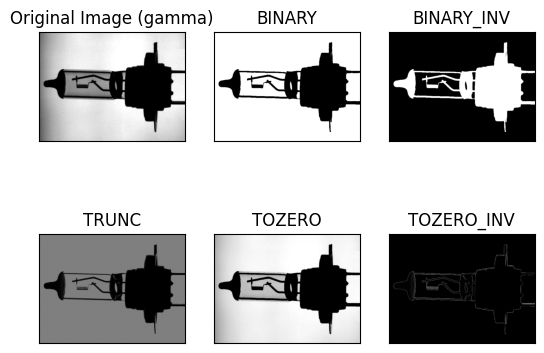

In [ ]:
gamma = 2  # <1 aclara medios tonos, >1 oscurece
LUT = np.array([((i / 255.0) ** gamma) * 255 for i in range(256)]).astype("uint8")
gamma_img3 = cv.LUT(img3, LUT)

# --- mostrar comparativa ---
plt.figure(figsize=(10,6))
ax1 = plt.subplot(2,2,1); ax2 = plt.subplot(2,2,3)
plot_img_and_hist(ax1, ax2, img3, 'img3')

ax3 = plt.subplot(2,2,2); ax4 = plt.subplot(2,2,4)
plot_img_and_hist(ax3, ax4, gamma_img3, 'img3 (gamma)')

plt.tight_layout()
plt.show()

# --- probar los diferentes tipos de umbralización ---
ret,thresh1 = cv.threshold(img3,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img3,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img3,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img3,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img3,127,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image (gamma)','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [gamma_img3, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1), plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

(np.float64(-0.5), np.float64(59.5), np.float64(29.5), np.float64(-0.5))

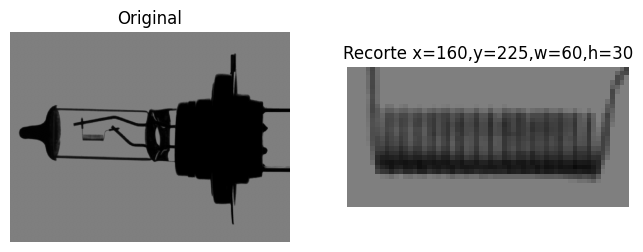

In [216]:

src=thresh3
assert src is not None, "No se pudo leer la imagen. Verifica la ruta."
# x = columna izquierda, y = fila superior, w = ancho, h = alto
x, y, w, h = 160, 225, 60, 30
crop = src[y:y+h, x:x+w]

# Mostrar original y recorte con histogramas
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
plt.imshow(src, cmap='gray', vmin=0, vmax=255)
plt.title('Original')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(crop, cmap='gray', vmin=0, vmax=255)
plt.title(f'Recorte x={x},y={y},w={w},h={h}')
plt.axis('off')